In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def flatten_img(img):
    return np.reshape(img, (img.shape[0]*img.shape[1], 1))

In [3]:
def unflatten_img(flat_img):
    img_width = int(math.sqrt(flat_img.size))
    return np.reshape(flat_img, (img_width, img_width,))

Load images

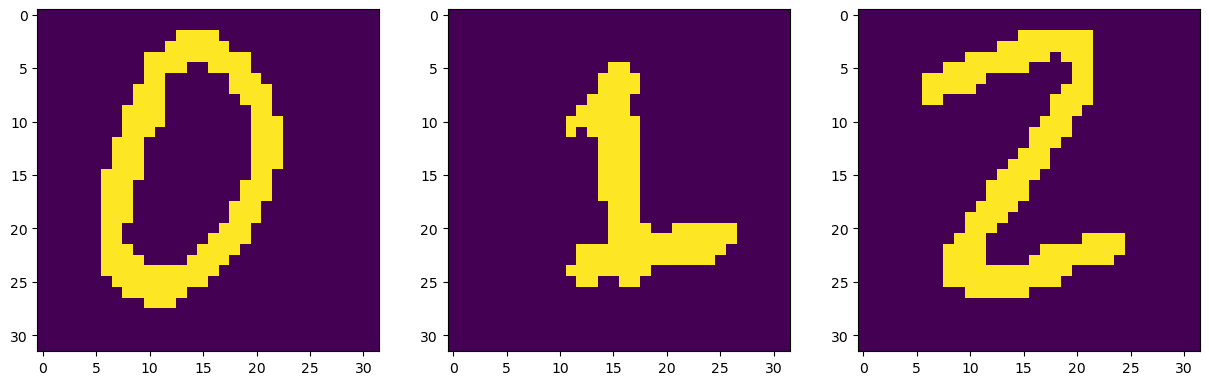

In [4]:
img_paths = ['p0.csv', 'p1.csv', 'p2.csv']
np_imgs = []

plt.figure(figsize=(15,9))
for i, pth in enumerate(img_paths):
    img = unflatten_img(np.genfromtxt(pth))
    img = np.swapaxes(img, 0, 1)
    np_imgs.append(img)
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
plt.show()

Distort function

In [5]:
def distort_image(img, prop=0.05):
    if prop<0 or prop>1:
        print('Out-of-bound proportion: going to default 0.05')
        prop = 0.05; # Default proportion
    
    num_pixels_to_change = round(img.size*prop)
    
    # Generate an array of ones and insert -1s at the start equal to the num of pixel to change
    # then shuffle and reshape to get the mask
    distortion_arr = np.ones(img.size)
    distortion_arr[:num_pixels_to_change] = -1
    distortion_mask = np.reshape(np.random.permutation(distortion_arr), img.shape)

    distorted_img = np.multiply(img, distortion_mask)

    return distorted_img

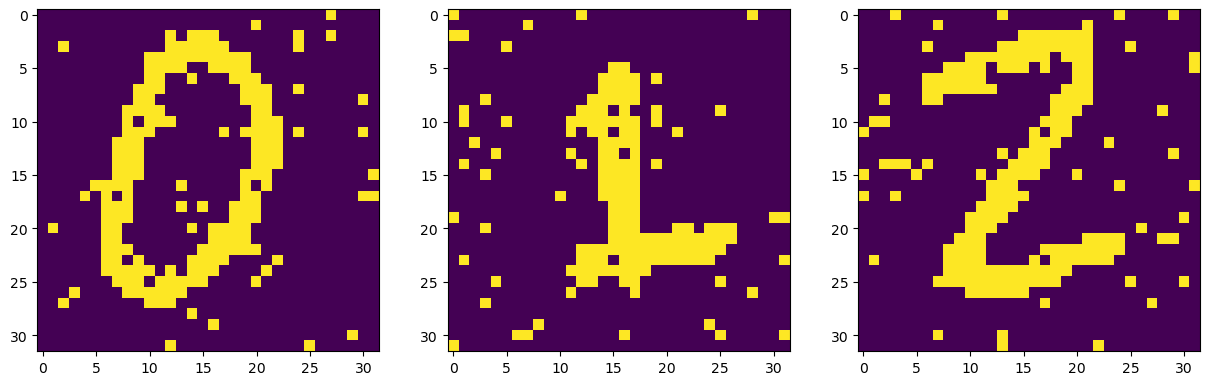

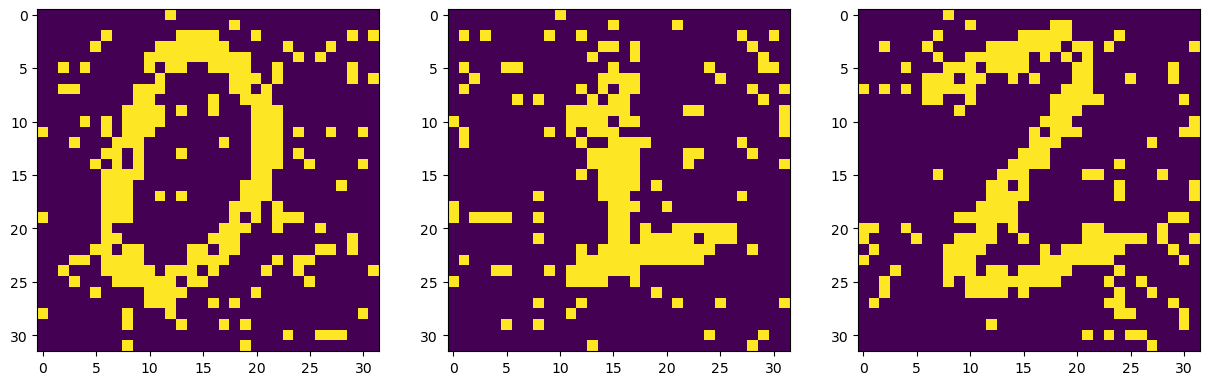

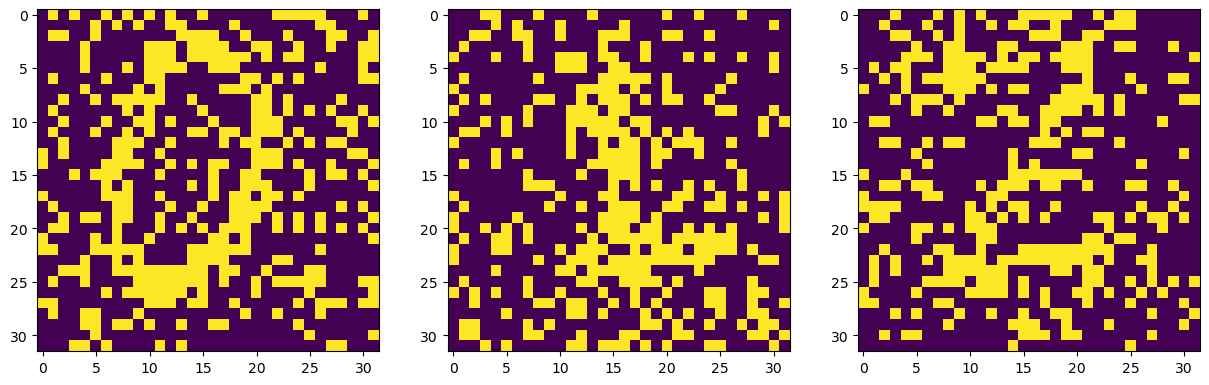

In [6]:
distorted_imgs = []
dist_prop_list = [0.05, 0.1, 0.25]

for dist_prop in dist_prop_list:
    plt.figure(figsize=(15,9))
    for i, img in enumerate(np_imgs):
        distorted_img = distort_image(img, dist_prop)
        distorted_imgs.append(distorted_img)

        plt.subplot(1, 3, i+1)
        plt.imshow(distorted_img)
    plt.show()

# Hopfield model

In [7]:
def storage_phase(X):
    # Flatten inputs
    flat_X = []
    for x in X:
        flat_X.append(flatten_img(x))

    # Convert to numpy array, rows are patterns and columns are features
    patterns = np.array(flat_X).reshape(len(flat_X), flat_X[0].shape[0])

    num_patterns = patterns.shape[0]
    num_neurons = patterns.shape[1]

    # Calulate weights following Hopfield model rule 
    weights = (np.matmul(patterns.T, patterns) - num_patterns * np.eye(num_neurons)) / num_neurons

    plt.imshow(weights)
    plt.title('Weigthts matrix')
    plt.show()

    return weights

In [8]:
# Return set of num_biases random biases
def init_bias(X, num_biases):
    # Flatten inputs
    flat_X = []
    for x in X:
        flat_X.append(flatten_img(x))

    # Convert to numpy array, rows are patterns and columns are features
    patterns = np.array(flat_X).reshape(len(flat_X), flat_X[0].shape[0])

    num_neurons = patterns.shape[1]

    rand_bias_set = np.random.rand(num_neurons, num_biases)

    return rand_bias_set

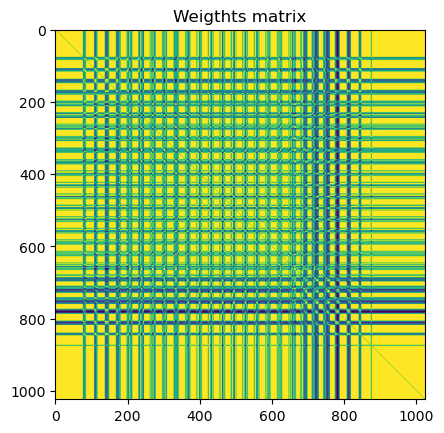

In [9]:
initial_w = storage_phase(np_imgs)
bias_set = init_bias(np_imgs, num_biases=1)

In [10]:
def create_overlap_fuctions(patterns):
    # Flatten inputs
    flat_pats = []
    for pattern in patterns:
        flat_pats.append(flatten_img(pattern))
    # Convert to numpy array, rows are patterns and columns are features
    #patterns = np.array(flat_pats).reshape(len(flat_pats), flat_pats[0].shape[0])

    # Create overlap function for each pattern
    overlap_functions = []
    for flat_pat in flat_pats:
        # Overlap function for each pattern
        overlap_func = lambda x, pattern=flat_pat: np.average(pattern * x)
        overlap_functions.append(overlap_func)
    
    return overlap_functions

In [11]:
def energy_function(x, w, bias):
    energy = np.dot(np.dot(np.transpose(x), w), x) + np.dot(np.transpose(x), bias)
    return energy.item()

In [12]:
def retrieve_sample(flat_x, w, bias, num_epochs, num_neurons, overlap_funcs, print_state=False):
    rec_x = flat_x.copy()
    energy_list = []
    overlap_list = []
    for f in overlap_funcs:
        overlap_list.append([])

    for epoch in range(num_epochs):
        neurons_order = np.random.permutation(range(num_neurons))
   
        for i, index in enumerate(neurons_order):
            # Calculate state
            rec_x[index, :] = np.sign(np.dot(w[index,:], rec_x) + bias[index])
            # Calculate energy
            energy_list.append(energy_function(rec_x, w, bias))
            # Calculate overlaps
            for j, f in enumerate(overlap_funcs):
                overlap_list[j].append(f(rec_x))

            if print_state and i % 100 == 0:
                plt.imshow(unflatten_img(rec_x))
                plt.show()

    return energy_list, overlap_list

In [13]:
def retrieval_phase(X, w, bias_set, num_epochs, overlap_funcs):
     # Flatten inputs
    flat_X = []
    for x in X:
        flat_X.append(flatten_img(x))

    num_neurons = flat_X[0].shape[0]

    for flat_x in flat_X:
        for i in range(bias_set.shape[1]):
            bias = bias_set[:, i]
            energy_list, overlap_list = retrieve_sample(flat_x, w, bias, num_epochs, num_neurons, overlap_funcs)

            plt.plot(energy_list)
            plt.title('Energy function')
            plt.figure(figsize=(15,5))
            plt.show()

            for overlap in overlap_list:
                plt.plot(overlap)

            plt.title('Overlap functions')
            plt.figure(figsize=(15,5))
            plt.show()

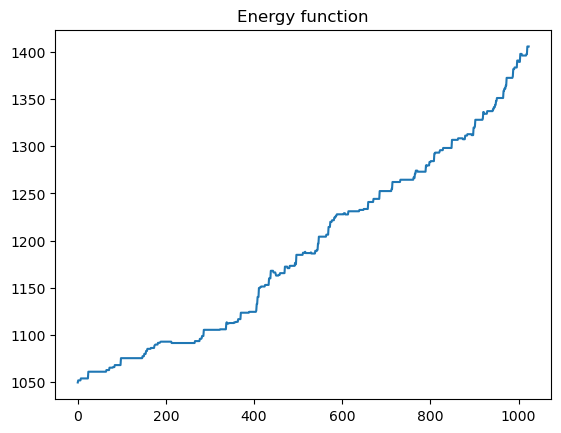

<Figure size 1500x500 with 0 Axes>

overlap: [0.900390625, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.900390625, 0.900390625, 0.900390625, 0.900390625, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90234375, 0.90

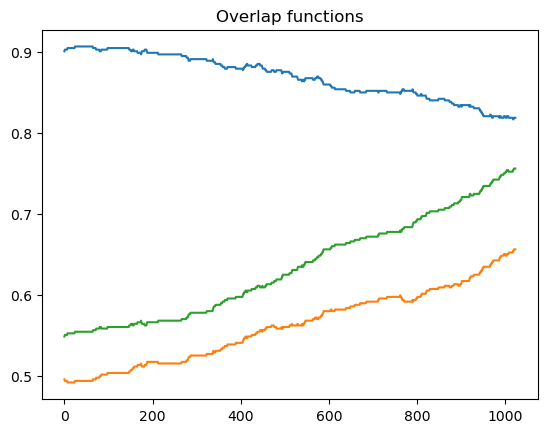

<Figure size 1500x500 with 0 Axes>

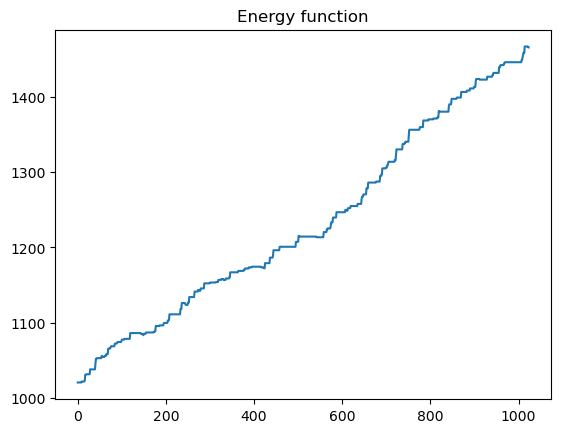

<Figure size 1500x500 with 0 Axes>

overlap: [0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.453125, 0.455078125, 0.455078125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.4609375, 0.462890625, 0.462890625, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.466796875, 0.466796875, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.46484375, 0.466796875, 0.466796875, 0.466796875, 0.466796875, 0.46875, 0.46875, 0.46875, 0.46875, 0.470703125, 0.470703125, 0.470703125, 0.470703125, 0.47265625, 0.47265625, 0.474609375, 0.474609375, 0.474609375, 0.474609375, 0.474609375, 0.474609375, 0.474609375,

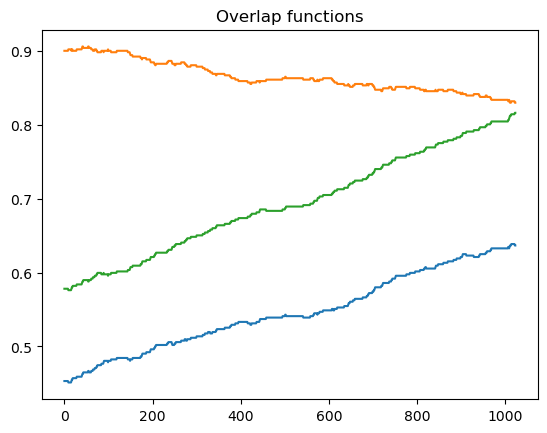

<Figure size 1500x500 with 0 Axes>

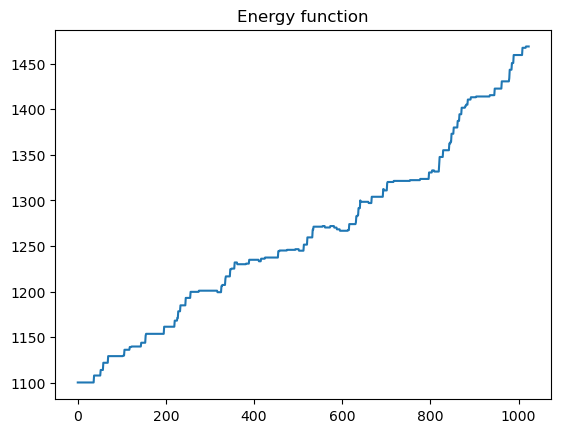

<Figure size 1500x500 with 0 Axes>

overlap: [0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.513671875, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.517578125, 0.517578125, 0.517578125, 0.517578125, 0.517578125, 0.517578125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.51953125, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.521484375, 0.5214

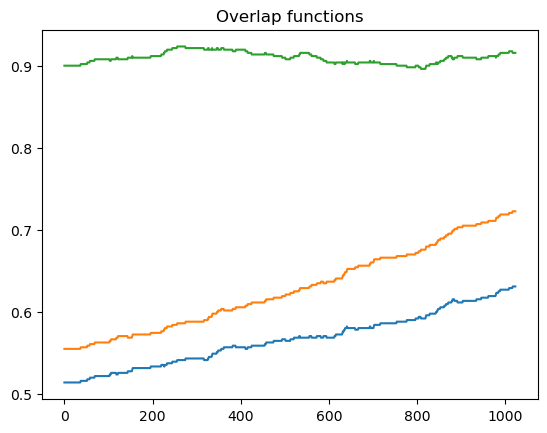

<Figure size 1500x500 with 0 Axes>

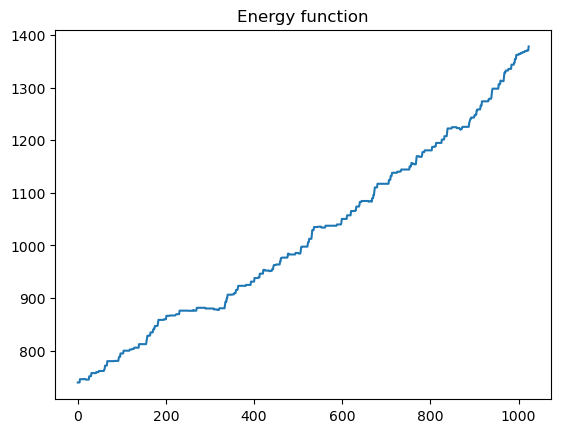

<Figure size 1500x500 with 0 Axes>

overlap: [0.80078125, 0.80078125, 0.80078125, 0.80078125, 0.80078125, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.8046875, 0.8046875, 0.8046875, 0.802734375, 0.802734375, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.802734375, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.8046875, 0.806640625, 0.8046875, 0.806640625, 0.806640625, 0.806640625, 0.806640625, 0.806640625, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.80859375

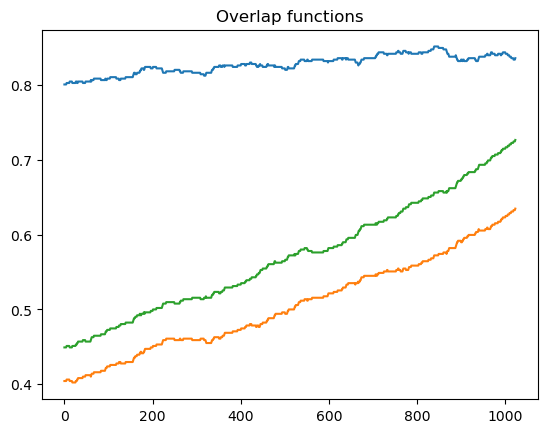

<Figure size 1500x500 with 0 Axes>

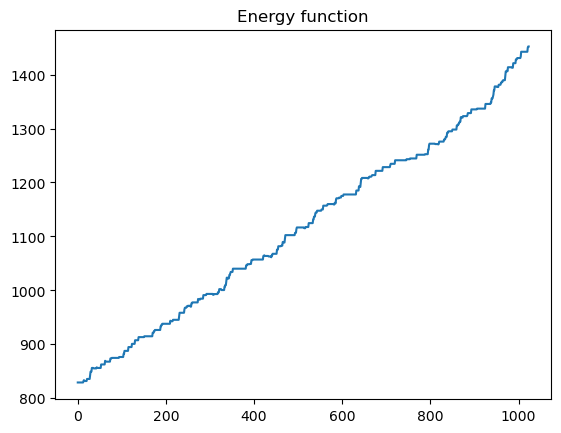

<Figure size 1500x500 with 0 Axes>

overlap: [0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.447265625, 0.44921875, 0.451171875, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.451171875, 0.453125, 0.455078125, 0.455078125, 0.453125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.455078125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.453125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.45703125, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.4609375, 0.4609375, 0.4609375, 0.462890625, 0.462890625, 0.462890625, 0.462890625, 0.462890625, 0.46

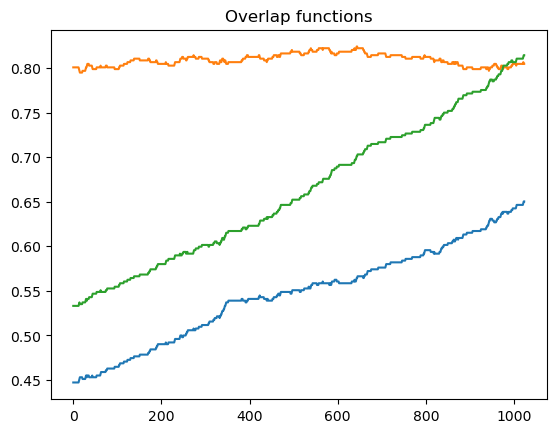

<Figure size 1500x500 with 0 Axes>

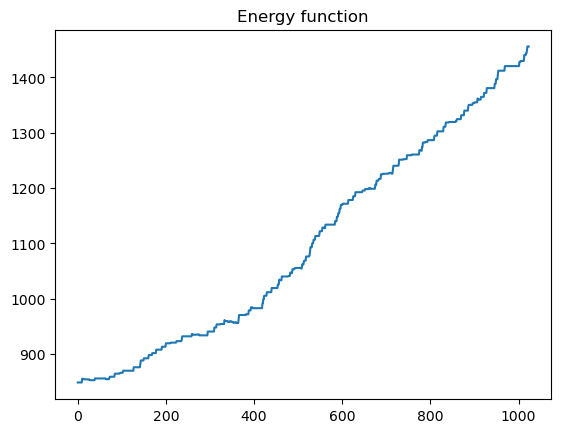

<Figure size 1500x500 with 0 Axes>

overlap: [0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.45703125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.455078125, 0.45703125, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375, 0.458984375,

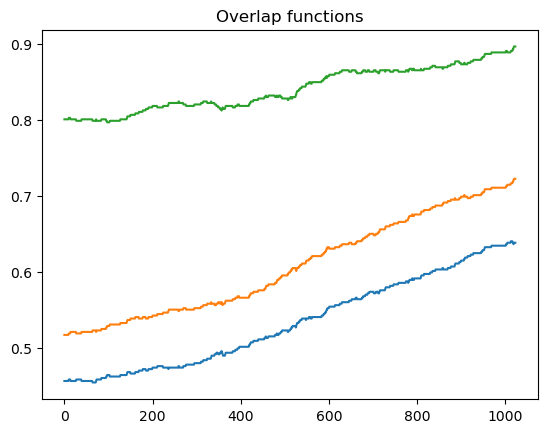

<Figure size 1500x500 with 0 Axes>

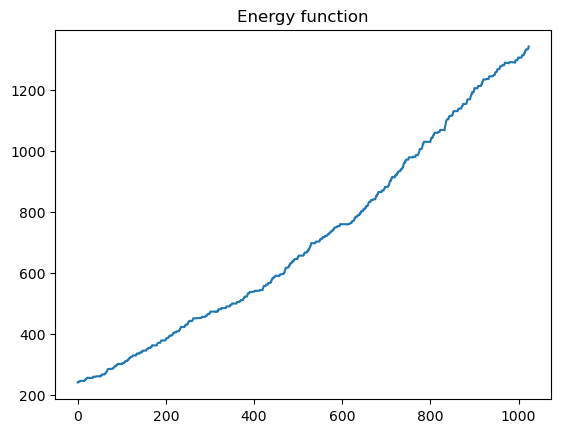

<Figure size 1500x500 with 0 Axes>

overlap: [0.5, 0.5, 0.501953125, 0.501953125, 0.501953125, 0.50390625, 0.50390625, 0.501953125, 0.501953125, 0.501953125, 0.501953125, 0.501953125, 0.501953125, 0.5, 0.5, 0.5, 0.501953125, 0.50390625, 0.50390625, 0.50390625, 0.505859375, 0.5078125, 0.5078125, 0.5078125, 0.5078125, 0.5078125, 0.5078125, 0.505859375, 0.505859375, 0.505859375, 0.505859375, 0.5078125, 0.5078125, 0.5078125, 0.5078125, 0.509765625, 0.509765625, 0.509765625, 0.509765625, 0.509765625, 0.509765625, 0.509765625, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.509765625, 0.51171875, 0.51171875, 0.509765625, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.51171875, 0.513671875, 0.513671875, 0.515625, 0.517578125, 0.51953125, 0.521484375, 0.5234375, 0.5234375, 0.525390625, 0.525390625, 0.525390625, 0.525390625, 0.525390625, 0.5234375, 0.525390625, 0.525390625, 0.525390625, 0.525390625, 0.52734375, 0.52734375, 0.529296875, 0.5312

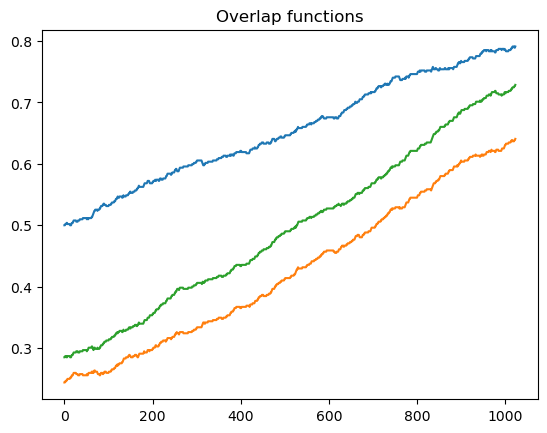

<Figure size 1500x500 with 0 Axes>

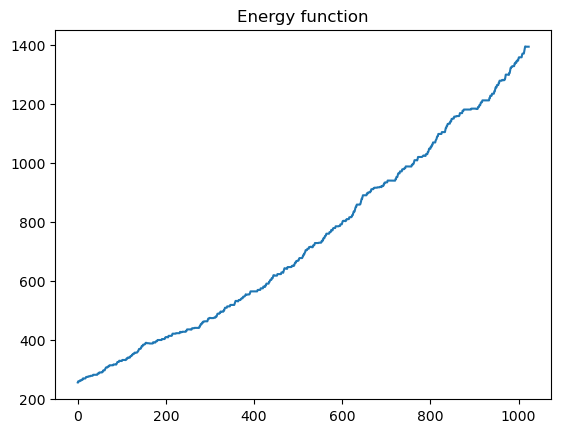

<Figure size 1500x500 with 0 Axes>

overlap: [0.251953125, 0.25390625, 0.25390625, 0.25390625, 0.25390625, 0.255859375, 0.255859375, 0.255859375, 0.255859375, 0.2578125, 0.2578125, 0.2578125, 0.259765625, 0.259765625, 0.2578125, 0.2578125, 0.2578125, 0.2578125, 0.259765625, 0.26171875, 0.26171875, 0.26171875, 0.26171875, 0.259765625, 0.26171875, 0.26171875, 0.26171875, 0.26171875, 0.26171875, 0.259765625, 0.259765625, 0.259765625, 0.259765625, 0.259765625, 0.26171875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.263671875, 0.265625, 0.263671875, 0.263671875, 0.263671875, 0.265625, 0.265625, 0.265625, 0.265625, 0.265625, 0.265625, 0.265625, 0.267578125, 0.267578125, 0.26953125, 0.26953125, 0.26953125, 0.26953125, 0.271484375, 0.26953125, 0.271484375, 0.271484375, 0.271484375, 0.271484375, 0.2734375, 0.2734375, 0.271484375, 0.271484375, 0.2734375, 0.2734375, 0.2734375, 0.2734375, 0.2734375, 0.2734375, 0.2734375, 0.2734375, 0.2734375, 0.275390625, 0.2

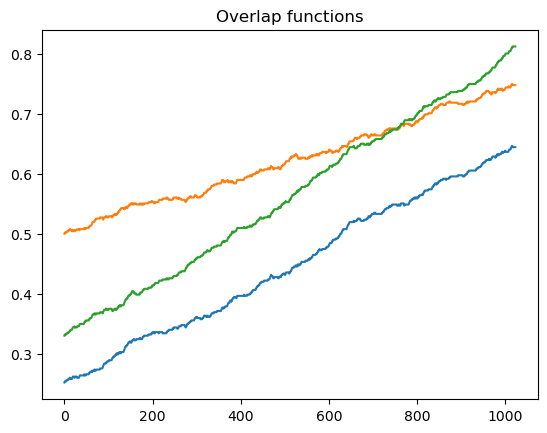

<Figure size 1500x500 with 0 Axes>

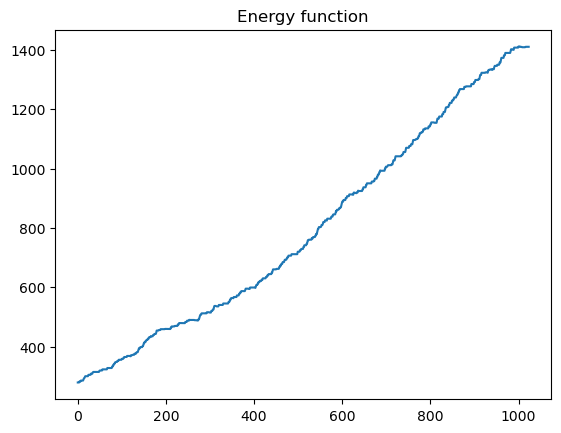

<Figure size 1500x500 with 0 Axes>

overlap: [0.314453125, 0.314453125, 0.314453125, 0.314453125, 0.31640625, 0.318359375, 0.318359375, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.322265625, 0.32421875, 0.326171875, 0.328125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.33203125, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.3359375, 0.337890625, 0.337890625, 0.337890625, 0.3359375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.330078125, 0.33203125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.330078125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.33203125, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.333984375, 0.3359375, 0.335

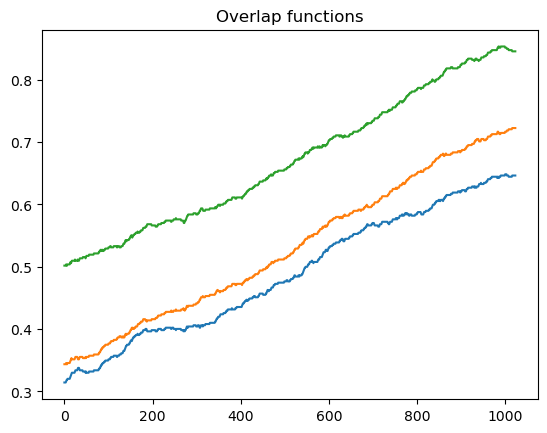

<Figure size 1500x500 with 0 Axes>

In [14]:
overlap_funcs = create_overlap_fuctions(np_imgs)
retrieval_phase(X=distorted_imgs, w=initial_w, bias_set=bias_set, num_epochs=1, overlap_funcs=overlap_funcs)